<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(_0_8)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_-0.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-0.8_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,49.289011,59.493259,-0.026645,118.755626,118.795549,-0.039923
1,0.0,1.0,26.990370,89.361008,0.190321,126.541698,126.410118,0.131580
2,0.0,2.0,78.090305,98.237365,-0.314582,186.013088,186.297430,-0.284342
3,0.0,3.0,91.703406,96.047075,-0.075974,197.674507,197.695640,-0.021133
4,0.0,4.0,69.157022,63.527507,-0.015253,142.669275,142.663326,0.005950
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,81.613705,48.050600,-0.079397,139.584908,139.807659,-0.222751
29996,999.0,26.0,79.367818,85.343183,-0.214241,174.496760,174.685875,-0.189115
29997,999.0,27.0,88.066141,60.975462,0.266679,159.308283,159.138287,0.169995
29998,999.0,28.0,76.147068,22.498027,0.219729,108.864823,108.892533,-0.027711


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    49.289011  59.493259 -0.026645  118.755626  118.795549 -0.039923
      1.0    26.990370  89.361008  0.190321  126.541698  126.410118  0.131580
      2.0    78.090305  98.237365 -0.314582  186.013088  186.297430 -0.284342
      3.0    91.703406  96.047075 -0.075974  197.674507  197.695640 -0.021133
      4.0    69.157022  63.527507 -0.015253  142.669275  142.663326  0.005950
...                ...        ...       ...         ...         ...       ...
999.0 25.0   81.613705  48.050600 -0.079397  139.584908  139.807659 -0.222751
      26.0   79.367818  85.343183 -0.214241  174.496760  174.685875 -0.189115
      27.0   88.066141  60.975462  0.266679  159.308283  159.138287  0.169995
      28.0   76.147068  22.498027  0.219729  108.864823  108.892533 -0.027711
      29.0   21.460797  69.797097 -0.337587  100.920307  101.207615 -0.287308

[30000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    49.289011  59.493259 -0.026645  118.755626  118.795549 -0.039923
      1.0    26.990370  89.361008  0.190321  126.541698  126.410118  0.131580
      2.0    78.090305  98.237365 -0.314582  186.013088  186.297430 -0.284342
      3.0    91.703406  96.047075 -0.075974  197.674507  197.695640 -0.021133
      4.0    69.157022  63.527507 -0.015253  142.669275  142.663326  0.005950
...                ...        ...       ...         ...         ...       ...
999.0 25.0   81.613705  48.050600 -0.079397  139.584908  139.807659 -0.222751
      26.0   79.367818  85.343183 -0.214241  174.496760  174.685875 -0.189115
      27.0   88.066141  60.975462  0.266679  159.308283  159.138287  0.169995
      28.0   76.147068  22.498027  0.219729  108.864823  108.892533 -0.027711
      29.0   21.460797  69.797097 -0.337587  100.920307  101.207615 -0.287308

[30000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,49.289011,59.493259,-0.026645,118.755626,118.795549,-0.039923
1,0.0,1.0,26.990370,89.361008,0.190321,126.541698,126.410118,0.131580
2,0.0,2.0,78.090305,98.237365,-0.314582,186.013088,186.297430,-0.284342
3,0.0,3.0,91.703406,96.047075,-0.075974,197.674507,197.695640,-0.021133
4,0.0,4.0,69.157022,63.527507,-0.015253,142.669275,142.663326,0.005950
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,81.613705,48.050600,-0.079397,139.584908,139.807659,-0.222751
29996,999.0,26.0,79.367818,85.343183,-0.214241,174.496760,174.685875,-0.189115
29997,999.0,27.0,88.066141,60.975462,0.266679,159.308283,159.138287,0.169995
29998,999.0,28.0,76.147068,22.498027,0.219729,108.864823,108.892533,-0.027711


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    49.289011  59.493259 -0.026645  118.755626  118.795549 -0.039923
      1.0    26.990370  89.361008  0.190321  126.541698  126.410118  0.131580
      2.0    78.090305  98.237365 -0.314582  186.013088  186.297430 -0.284342
      3.0    91.703406  96.047075 -0.075974  197.674507  197.695640 -0.021133
      4.0    69.157022  63.527507 -0.015253  142.669275  142.663326  0.005950
...                ...        ...       ...         ...         ...       ...
999.0 25.0   81.613705  48.050600 -0.079397  139.584908  139.807659 -0.222751
      26.0   79.367818  85.343183 -0.214241  174.496760  174.685875 -0.189115
      27.0   88.066141  60.975462  0.266679  159.308283  159.138287  0.169995
      28.0   76.147068  22.498027  0.219729  108.864823  108.892533 -0.027711
      29.0   21.460797  69.797097 -0.337587  100.920307  101.207615 -0.287308

[30000 rows x 6 columns]

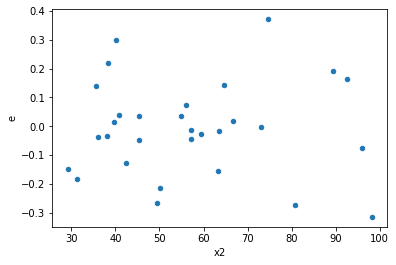

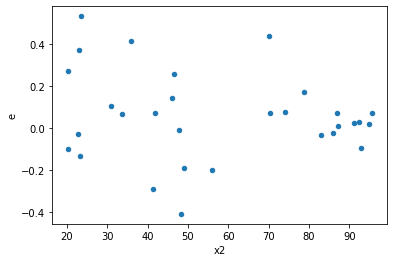

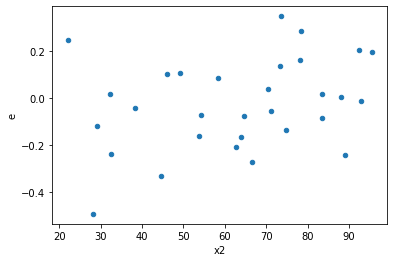

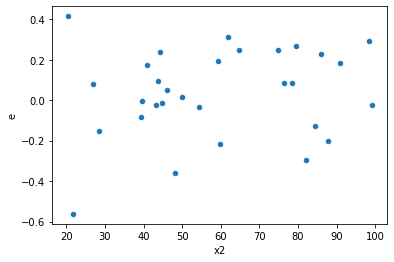

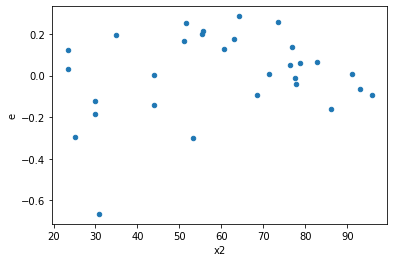

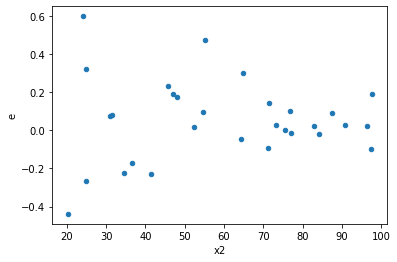

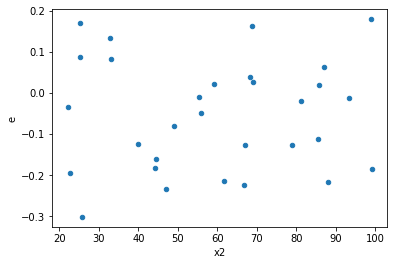

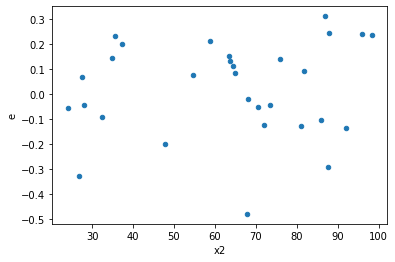

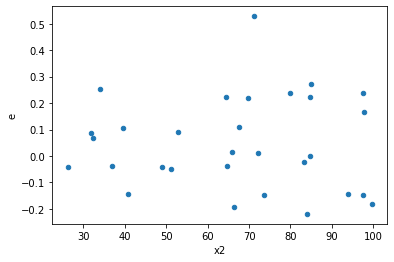

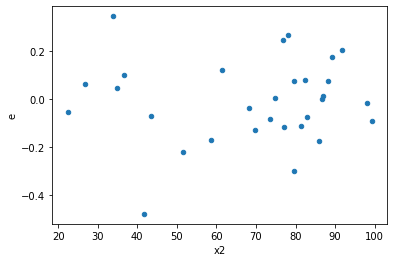

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,11.0,15.0,0.13696276942479294,0.8579154007992242,0.012451160856799358,0.057194360053281615,4.59349619775001,0.007499254427366209,0.9962503727863169,0.0037496272136831044,Reject001=0 : Heteroscedasticity
3.0,16.0,10.0,0.5772663817286516,0.64566108059449,0.03607914885804073,0.064566108059449,1.7895684932450828,0.35287692509999014,0.8235615374500049,0.17643846254999507,Reject001=1 : Homoscedasticity
4.0,15.0,11.0,0.3371182654058169,0.7476942636361449,0.02247455102705446,0.06797220578510409,3.0244077269121132,0.07004152075834447,0.9649792396208278,0.03502076037917223,Reject001=1 : Homoscedasticity
5.0,10.0,16.0,0.20486000087926537,0.8200609124099496,0.02048600008792654,0.05125380702562185,2.5018943085833714,0.09879183802311253,0.9506040809884437,0.049395919011556266,Reject001=1 : Homoscedasticity
6.0,12.0,14.0,0.14286644414696414,0.31628795050766556,0.011905537012247011,0.022591996464833255,1.8976041518827143,0.25276657517840717,0.8736167124107964,0.12638328758920359,Reject001=1 : Homoscedasticity
7.0,15.0,11.0,0.36481560302882876,0.40594930953380465,0.02432104020192192,0.036904482684891333,1.5173891568163698,0.49058143151811473,0.7547092842409426,0.24529071575905737,Reject001=1 : Homoscedasticity
9.0,12.0,14.0,0.20969880320558992,0.46355485478814107,0.017474900267132495,0.03311106105629579,1.894778256249761,0.25384900288247736,0.8730754985587613,0.12692450144123868,Reject001=1 : Homoscedasticity
12.0,14.0,12.0,0.6318484639173564,0.5826346359781349,0.045132033136954026,0.048552886331511245,1.0757965674663177,0.909023415558702,0.545488292220649,0.454511707779351,Reject001=1 : Homoscedasticity
13.0,14.0,12.0,0.6135284679331668,0.5773362406274366,0.0438234619952262,0.04811135338561972,1.097844652046445,0.880804338828415,0.5595978305857925,0.4404021694142075,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,10.0,16.0,0.438602136895959,0.24682489231957827,0.0438602136895959,0.015426555769973642,0.3517209441602192,0.09829845785565909,Reject001=1 : Homoscedasticity
1.0,11.0,15.0,0.13696276942479294,0.8579154007992242,0.012451160856799358,0.057194360053281615,4.59349619775001,0.007499254427366209,Reject001=0 : Heteroscedasticity
2.0,12.0,14.0,0.36968466392761135,0.32925380469111154,0.030807055327300947,0.02351812890650797,0.7634007423509382,0.646042393959082,Reject001=1 : Homoscedasticity
3.0,16.0,10.0,0.5772663817286516,0.64566108059449,0.03607914885804073,0.064566108059449,1.7895684932450828,0.35287692509999014,Reject001=1 : Homoscedasticity
4.0,15.0,11.0,0.3371182654058169,0.7476942636361449,0.02247455102705446,0.06797220578510409,3.0244077269121132,0.07004152075834447,Reject001=1 : Homoscedasticity
5.0,10.0,16.0,0.20486000087926537,0.8200609124099496,0.02048600008792654,0.05125380702562185,2.5018943085833714,0.09879183802311253,Reject001=1 : Homoscedasticity
6.0,12.0,14.0,0.14286644414696414,0.31628795050766556,0.011905537012247011,0.022591996464833255,1.8976041518827143,0.25276657517840717,Reject001=1 : Homoscedasticity
7.0,15.0,11.0,0.36481560302882876,0.40594930953380465,0.02432104020192192,0.036904482684891333,1.5173891568163698,0.49058143151811473,Reject001=1 : Homoscedasticity
8.0,15.0,11.0,0.4736626412671787,0.3492549143657406,0.031577509417811914,0.03175044676052187,1.005476598563293,0.9844013834111895,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      947
Reject001=0 : Heteroscedasticity     53
Name: Result_test, dtype: int64